In [1]:
# ==== Mount Google Drive ====
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 安装依赖
!pip install -q "flwr[simulation]" torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.6/617.6 kB 37.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 44.0.3 which is in

In [2]:
# Federated+clusrer 30min → 30min(add weather feature)

# ----  Set Project Root Directory ----
import os, sys
project_root = "/content/drive/MyDrive/elec_forecasting"
os.chdir(project_root)
sys.path.append(project_root)

# ---- Import modules ----
from utils.visualization import (
    save_sorted_r2_plot,
    save_sorted_mae_plot,
    save_sorted_rmse_plot,
)


In [ ]:
# Step 2: 训练带聚类的联邦模型
!python cluster/run_clustered_fl.py


流式输出内容被截断，只能显示最后 5000 行内容。
INFO :      configure_fit: strategy sampled 4 clients (out of 9)
(ClientAppActor pid=21153) [H9] round=23  R²=0.335  MAE=119.4
(ClientAppActor pid=21153) Loading cached dataset from: data/cached/dataset_w6_h6_sum_normX_resample5min_timeweather.pkl
(ClientAppActor pid=21153) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=21153) 
(ClientAppActor pid=21153)             This is a deprecated feature. It will be removed
(ClientAppActor pid=21153)             entirely in future versions of Flower.
(ClientAppActor pid=21153)         
(ClientAppActor pid=21151) 
(ClientAppActor pid=21151)         
(ClientAppActor pid=21151) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` 

In [3]:
!python cluster/generate_all_eval_metrics_best.py


 Processing cluster_0
[cluster_0]  Saved best-round metrics to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min_tw/cluster_0/eval_metrics_best.csv

 Processing cluster_1
[cluster_1]  Saved best-round metrics to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min_tw/cluster_1/eval_metrics_best.csv

 Processing cluster_2
[cluster_2]  Saved best-round metrics to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min_tw/cluster_2/eval_metrics_best.csv


In [6]:
!python cluster/postprocess_all_clusters.py

2025-08-19 17:12:42.746441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755623562.772879    2436 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755623562.780922    2436 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755623562.800131    2436 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755623562.800176    2436 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755623562.800181    2436 computation_placer.cc:177] computation placer alr

In [7]:
!python cluster/merge_all_eval_best.py

✅ Appended GLOBAL-ALL from global_all_metrics.csv
✅ Merged successfully: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min_tw/merged_eval_metrics_best.csv


R² comparison plot saved to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/merged_plots/r2_sorted_plot.png


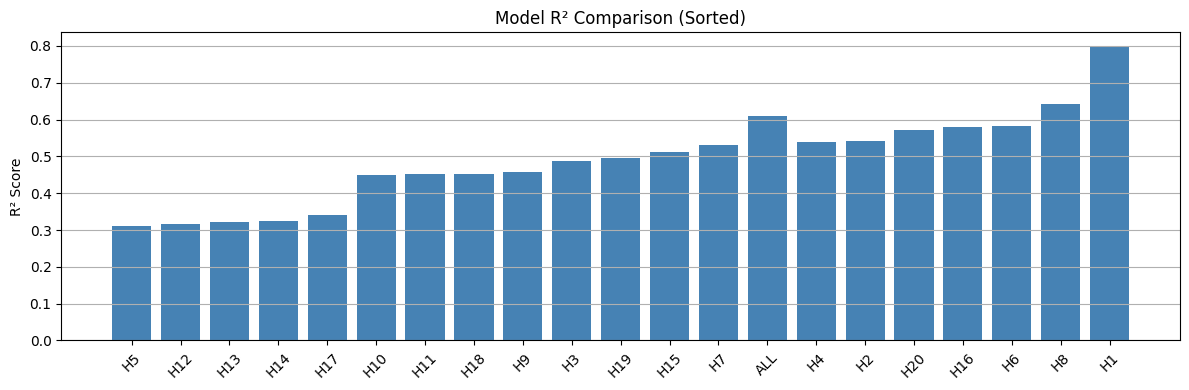

MAE comparison plot saved to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/merged_plots/mae_sorted_plot.png


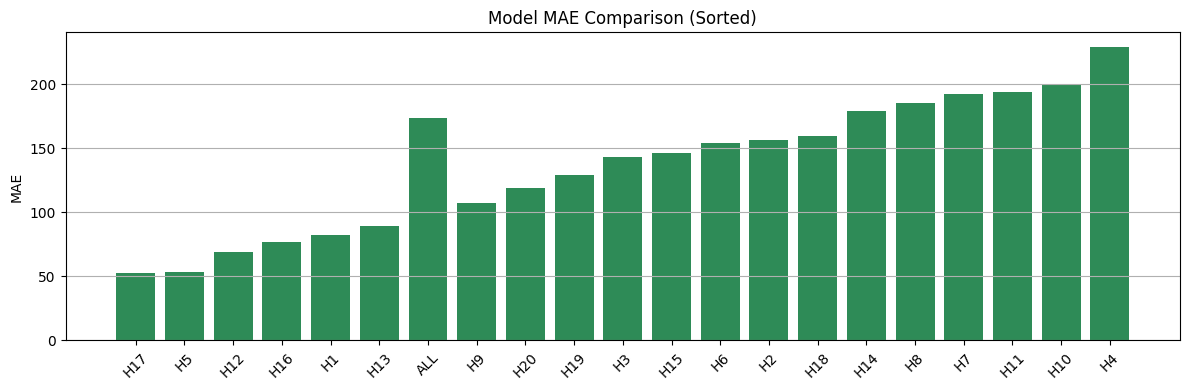

In [8]:
project_root = "/content/drive/MyDrive/elec_forecasting"
eval_csv_path = os.path.join(project_root, "experiments", "clustered_fl", "30min_30min_tw", "merged_eval_metrics_best.csv")
plot_dir = os.path.join(project_root, "experiments", "clustered_fl", "merged_plots")
os.makedirs(plot_dir, exist_ok=True)

save_sorted_r2_plot(eval_csv_path, save_path=os.path.join(plot_dir, "r2_sorted_plot.png"))
save_sorted_mae_plot(eval_csv_path, save_path=os.path.join(plot_dir, "mae_sorted_plot.png"))


In [ ]:
# 重新加载模块
import importlib
import utils.visualization
importlib.reload(utils.visualization)

# 然后再导入函数
from utils.visualization import plot_clustered_vs_timefeat_clustered


# ==== Set CSV Paths ====
config_name = "30min_30min"
timefeat_cluster_path = os.path.join(project_root, "experiments", "clustered_fl", config_name + "_t", "merged_eval_metrics_best.csv")
weatherfeat_cluster_path = os.path.join(project_root, "experiments", "clustered_fl", config_name + "_tw", "merged_eval_metrics_best.csv")

# ==== 设置保存路径 ====
save_dir = os.path.join(project_root, "comparison_plots_cluster_vs_time", config_name)
os.makedirs(save_dir, exist_ok=True)

# ==== 画图并保存 ====
plot_clustered_vs_timefeat_clustered(
    base_cluster_path, timefeat_cluster_path,
    metric="R^2",
    title=f"Clustered vs Clustered+Time - {config_name} - R²",
    save_path=os.path.join(save_dir, "r2_comparison.png")
)

plot_clustered_vs_timefeat_clustered(
    base_cluster_path, timefeat_cluster_path,
    metric="MAE",
    title=f"Clustered vs Clustered+Time - {config_name} - MAE",
    save_path=os.path.join(save_dir, "mae_comparison.png")
)

plot_clustered_vs_timefeat_clustered(
    base_cluster_path, timefeat_cluster_path,
    metric="RMSE",
    title=f"Clustered vs Clustered+Time - {config_name} - RMSE",
    save_path=os.path.join(save_dir, "rmse_comparison.png")
)

print(f"Clustered vs Clustered+Time 对比图已保存至: {save_dir}")
